In [1]:
from matplotlib import pyplot as plt
from pandas import read_excel, concat
import seaborn as sb
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [15]:
df = read_excel("C:\\Users\\User\\Desktop\\궁둥박사\\BigdatamegaIT\\수업내용\\D_탐색적_데이터\\01_데이터_시각화/mpg.xlsx", index_col = 'id')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize


# 문제 1.

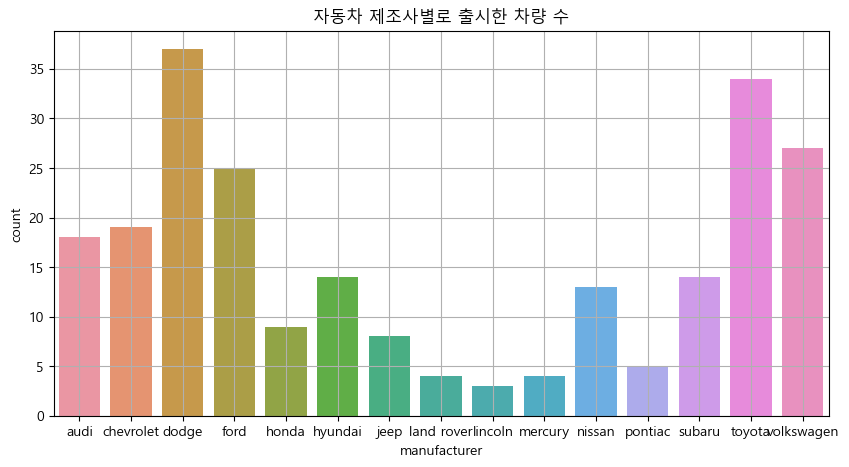

In [16]:
sb.countplot(data = df, x = 'manufacturer')
plt.title("자동차 제조사별로 출시한 차량 수")
plt.rcParams["figure.figsize"] = (22, 10)
plt.grid()
plt.show()
plt.close()

# 문제 02.

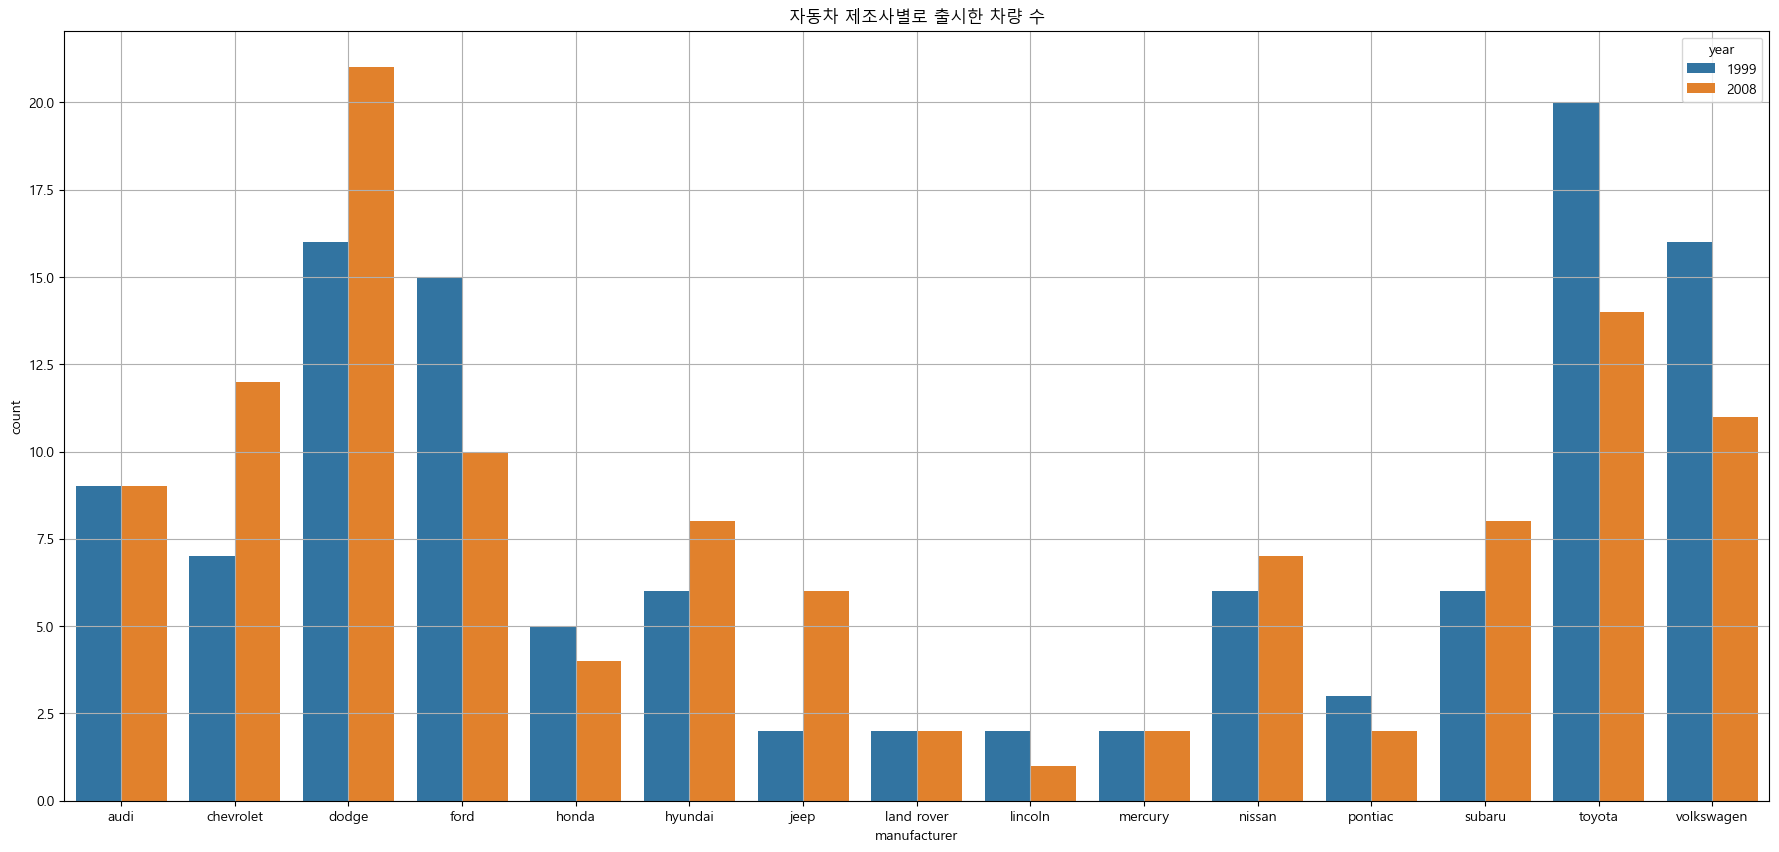

In [17]:
sb.countplot(data = df, x = 'manufacturer', hue = 'year')
plt.title("자동차 제조사별로 출시한 차량 수")
plt.rcParams["figure.figsize"] = (15, 10)
plt.grid()
plt.show()
plt.close()

# 문제 3

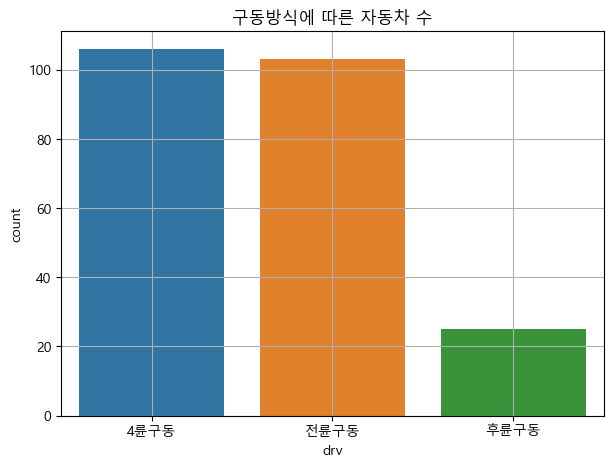

In [19]:
sb.countplot(data = df, x = 'drv')
plt.title("구동방식에 따른 자동차 수")
plt.rcParams["figure.figsize"] = (7, 5)

plt.xticks([0, 1, 2], ['4륜구동', '전륜구동', '후륜구동'])
plt.grid()
plt.show()
plt.close()

# 문제 4

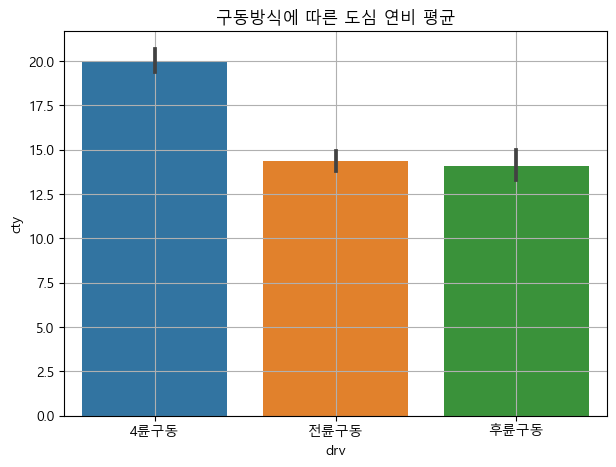

In [20]:
sb.barplot(data = df, x = 'drv', y = 'cty')
plt.title("구동방식에 따른 도심 연비 평균")
plt.xticks([0, 1, 2], ['4륜구동', '전륜구동', '후륜구동'])
plt.rcParams["figure.figsize"] = (10, 5)
plt.grid()
plt.show()
plt.close()